# Linear Regression
Motto of this and all subsequent courses: **"If you can't implement it, you don't understand it."**

The very first machine learning model which serves as an introduction to the field.

## Statistics vs Machine learning
- Machine learning approach - interested in models with high predictive accuracy, loss functions, minimizing loss functions, train and test sets, hyperparameters, generalization, overfitting, regularization


- Statistics approach - interested in models with strong explanatory power, significance tests (ANOVA, t-tests etc.), model 
diagnostics, model building and selection (forward, backward stepwise), evaluation (AIC, BIC), standard transformations (Box-Cox), residual analysis

## Supervised learning vs unsupervised learning
- Supervised learning has a target variable, which we want to learn how to predict. Linear regression is in this category
    - Regression - trying to predict a real valued number, eg. temperature, price, age
    - Classification - trying to predict a category, eg. day of month, blood type, presence of cancer
- Unsupervised learning does not have a target variable and the goal is to reveals underlying patterns within the data

# 1D Linear regression
- Problem definition: Given some data, we want to find a line that best fits that data, so we can make predictions from input variables alone

<img src="assets/1dregression.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px"
     width="300"/>

## Preliminaries

- given a set of datapoints $data = \{(x_1, y_1), ..., (x_N, y_N)\}$, where $(x_i, y_i)$ denote the pair of input variable $x$ and target variable $y$ for datapoint $i$, $N$ denotes the number of datapoints
- a 1D line is given by the equation $y = mx + b$,
- for a fitted line $\hat{y}$ and point $(x_i, y_i)$, the prediction value is given by $\hat{y_i} = ax_i + b$
- define a cost function $J$ to quantify how well the data is being fit
- $J = \sum_{i = 1}^{N} (\hat{y_i} - y_i)^2$, also known as the sum of square errors, ie. for every datapoint find the difference between the predicted value and the actual value and square it
- defining $J$ as such is a good choice, since the difference between predicted values and actual values will always be positive. If we didn't square the difference, the errors would end up cancelling out. Furthermore larger error get penalized more due to the square.

## Solution
What follows is an approach to finding the parameters $a, b$ such that the data is best fit, ie. the cost function is minimized

### Calculus essentials
- from calculus we know that the gradient is a vector of partial derivatives with respect to the inputs
- $\triangledown f(p) = \begin{bmatrix} \displaystyle \frac{\partial f(p)}{\partial x_1} \\ \vdots \\ \displaystyle \frac{\partial f(p)}{\partial x_n} \end{bmatrix}$, given a function $f$ at point $p$ and $n$ input variables, $\triangledown f(p)$ gives the gradient at point $p$

**Statement:** *The gradient points to the direction of steepest ascent*

<img src="assets/gradient.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px"
     width="500"/>

- for a given input value $w_0$, consider its gradients
- for the subset of $w$ values yielding a positive gradient, by subtracting the gradient from $w_0$, we move to the left where, correspondingly, the value of $J(w)$ decreases
- likewise for the subsect of $w$ values yielding a negative gradient, by subtracting the gradient from $w_0$, we move to the right (subtracting a negative is equivalent to adding), we move to the right where, correspondingly, the value of $J(w)$ decreases

#### Gradient descent
Thus we arrive at the crucial algorithm used to minimize cost functions in machine learning, **the gradient descent algorithm**

- (general case for multiple input variables) for every input parameter $x_i$ we update its value by subtracting a small multiple $\epsilon$ (epsilon)  of the partial derivative with respect to $x_i$
- $x_i := x_i - \frac{\partial J(x_i)}{\partial x_i}$
- for a more compact notation we place all input variables into a vector $\theta$ 
- $\theta = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}$
- the we can express the simultaneous update of all input variables in a single equation
- $\theta = \theta - \epsilon \triangledown{J}$

### Closed form solution
- though we could certainly find the optimal parameters for linear regression with the use of gradient descent, linear regression is a special case of machine learning algorithm for which a closed form solution exists
- a closed form solution indicates that the optimal parameters can be gained from a direct calculation
- gradient descent gets us into a minimum by continuously going "downhill" on the cost function until we reach a point where the gradient is equal to zero
- the gradient could also however be equal to zero in a maximum, so with a closed form solution it might not be clear if a minimum is found, **EXCEPT** that the Squared error function is a *convex*, for which we know a global minimum will be found

Once again: we would like to find a line $\hat{y} = ax + b$, given by parameters $a, b$. We have also defined a cost function $J$, which quantifies how well $\hat{y}$ fits the data. The best fit will be given by values $a, b$ which minimize $J$. These values can be found by figuring out where $\triangledown{J} = \vec{0}$, ie. $\frac{\partial J}{\partial a} = 0$ and $\frac{\partial J}{\partial b} = 0$

$J = \sum_{i = 1}^{N} (\hat{y_i}- y_i )^2$  
$\equiv J = \sum_{i = 1}^{N} (y_i - \hat{y_i})^2$  
$ \equiv J = \sum_{i = 1}^{N} (y_i - (ax_i + b))^2$

___

$\frac{\partial J}{\partial a} = \frac{\partial}{\partial a}\sum_{i = 1}^{N} (y_i - (ax_i + b))^2 = 0$  
$\equiv \frac{\partial}{\partial a}(y_1 - (ax_1 + b))^2 + \dots + \frac{\partial}{\partial a}(y_N - (ax_N + b))^2 = 0$   
$\equiv \frac{\partial}{\partial a}(y_1 - ax_1 - b)^2 + \dots + \frac{\partial}{\partial a}(y_N - ax_N - b)^2 = 0$  
$\equiv 2(y_1 - ax_1 - b)(-x_1) + \dots + 2(y_N - ax_N - b)(-x_N) = 0$  
$\equiv -2(y_1x_1 - ax_1^2 - bx_1) - \dots - 2(y_Nx_N - ax_N^2 - bx_N) = 0$  
$\equiv (y_1x_1 - ax_1^2 - bx_1) + \dots + (y_Nx_N - ax_N^2 - bx_N) = 0$  
$\equiv (y_1x_1 + \dots \ y_Nx_N) = (ax_1^2 + \dots + ax_N^2) + (bx_1 + \dots + bx_N)$  
$\equiv (y_1x_1 + \dots \ y_Nx_N) = a(x_1^2 + \dots + x_N^2) + b(x_1 + \dots + x_N)$  
$\equiv \sum_{i=1}^{N} y_ix_i = a\sum_{i=1}^{N} x_i^2 + b\sum_{i=1}^{N} x_i$ &ensp;&ensp; $(1)$

___

$\frac{\partial J}{\partial b} = \frac{\partial}{\partial b}\sum_{i = 1}^{N} (y_i - (ax_i + b))^2 = 0$  
$\equiv \frac{\partial}{\partial b}(y_1 - (ax_1 + b))^2 + \dots + \frac{\partial}{\partial b}(y_N - (ax_N + b))^2 = 0$    
$\equiv \frac{\partial}{\partial b}(y_1 - ax_1 - b)^2 + \dots + \frac{\partial}{\partial b}(y_N - ax_N - b)^2 = 0$  
$\equiv 2(y_1 - ax_1 - b)(-1) + \dots + 2(y_N - ax_N - b)(-1) = 0$  
$\equiv (y_1 - ax_1 - b) + \dots + (y_N - ax_N - b) = 0$  
$\equiv (y_1 + \dots + y_N) = (ax_1 + \dots + ax_N) + (b + \dots + b)$  
$\equiv (y_1 + \dots + y_N) = a(x_1 + \dots + x_N) + bN$  
$\equiv \sum_{i=1}^{N}y_i = a\sum_{i=1}^{N}x_i + bN$ &ensp;&ensp; $(2)$

Substituting into $(1)$ and $(2)$:
- $C = \sum_{i=1}^{N} x_i^2$  
- $D = \sum_{i=1}^{N} x_i$  
- $E = \sum_{i=1}^{N} y_ix_i$  
- $F = \sum_{i=1}^{N}y_i$   

yields:  
$E = aC + bD$  
$F = aD + bN$

solving for $a, b$:  
$a = \frac{NE - DF}{NC - D^2}$  
$b = \frac{FC - DE}{NC - D^2}$

and subtituting back:  
$a = \frac{N\sum_{i=1}^{N} y_ix_i - \sum_{i=1}^{N} x_i \sum_{i=1}^{N}y_i}{N \sum_{i=1}^{N} x_i^2 - {(\sum_{i=1}^{N} x_i)}^2}$  
$b = \frac{\sum_{i=1}^{N}y_i\sum_{i=1}^{N} x_i^2 - \sum_{i=1}^{N} x_i \sum_{i=1}^{N} y_ix_i}{N\sum_{i=1}^{N} x_i^2 - {(\sum_{i=1}^{N} x_i)}^2}$

And we're done. Parameters $a, b$ can now be calculated directly from the datapoints.
But for further simplification we divide the numerators and denominators by $N^2$  
$a = \frac{\frac{\sum_{i=1}^{N} y_ix_i}{N} - \frac{\sum_{i=1}^{N} x_i}{N} \frac{\sum_{i=1}^{N}y_i}{N}}{\frac{\sum_{i=1}^{N} x_i^2}{N} - {(\frac{\sum_{i=1}^{N} x_i}{N})}^2}$  
$b = \frac{\frac{\sum_{i=1}^{N}y_i}{N} \frac{\sum_{i=1}^{N} x_i^2}{N} - \frac{\sum_{i=1}^{N} x_i}{N} \frac{\sum_{i=1}^{N} y_ix_i}{N}}{\frac{\sum_{i=1}^{N} x_i^2}{N} - {(\frac{\sum_{i=1}^{N} x_i}{N})}^2}$

Now using the definition of the mean:  
$\bar{x} = \frac{\sum_{i=1}^{N}x_i}{N}$  
$\bar{xy} = \frac{\sum_{i=1}^{N}x_iy_i}{N}$

Subtitute into $a, b$:  
$a = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2}$  
$b = \frac{\bar{y} \bar{x^2} - \bar{x} \bar{xy}}{\bar{x^2} - \bar{x}^2}$

## Coding 1D linear regression

a = 2.0817640146785092, b = 0.02242686467597558


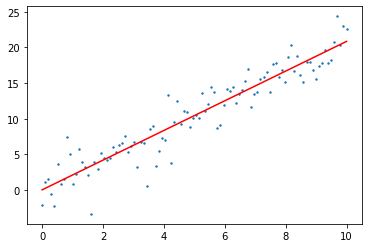

In [2]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining dataset
# Data is generated by y = 2*x + 1 + 3*epsilon, where epsilon ~N(0;1)
X = np.linspace(0, 10, 100)
Y = 2*X + 1 + 2*np.random.randn(100)

# Plotting data
fig, ax = plt.subplots()
ax.scatter(X, Y, s=2);
ax.set_title = "Fitting a line"
ax.set_xlabel = "input data"
ax.set_ylabel = "output"

# Calculation of line parameters
a = (np.mean(X*Y) - np.mean(X)*np.mean(Y))/(np.mean(X**2) - np.mean(X)**2)
b = (np.mean(Y)*np.mean(X**2) - np.mean(X) * np.mean(X*Y))/(np.mean(X**2) - np.mean(X)**2)
print(f"a = {a}, b = {b}")

# Plotting line of best fit into fig
Y_hat = a*X + b
ax.plot(X, Y_hat, c='r');

## Model evaluation

- The most commmon metric for evaluating a linear regression model is $R^2$  
$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$  
$SS_{res} = \sum_{i=1}^{N}(y_i - \hat{y_i})^2$  
- $SS_{res}$ is what we have already seen in the cost function. It's the sum of squared differences between predicted values and actual values
$SS_{tot} = \sum_{i=1}^{N}(y_i - \bar{y})^2$
- $SS_{tot}$ returns the sum of squared differences between actual values and their mean
- As we know, the simplest model one could fit is simply outputting the mean of targets regardless of the inputs. For this case $SS_{res}$ is equal to $SS_{tot}$, and $R^2$ then equals 0 meaning our model has very low predictive power.
- If our model was somehow able to predict exactly the desired values, $SS_{res}$ would then be equal to 0, and $R^2$ would be equal to 1, which would be the theoretical ideal case.
- In some extreme cases $R^2$ could even be negative if the predictions would actually be worse then simply predicting the mean.



In [6]:
# Using the same model parameters from the previous code cell
# Calculate R^2

SS_res = (Y_hat - Y).dot(Y_hat - Y)
SS_tot = (Y - Y.mean()).dot(Y - Y.mean())
R2 = 1 - SS_res/SS_tot

print(f"R^2 = {R2}")

R^2 = 0.8928137339361116


# Multiple linear regression
- Multiple linear regression differs from 1D regression in that it allows for multiple input values. We denote the dimensionality of inputs as $D$

## Preliminaries
- the $D$-dimensional dataset with $N$ datapoints is given by $data = \{((x_{11}, \dots, x_{1D}), y_1), \dots, ((x_{N1}, \dots, x_{ND}), y_N)\}$
- an invididual datapoint $i$ are denoted as a column vector $\mathbf{x_i}$ with dimension $Dx1$
- we collect the input variables into an $NxD$ matrix $\mathbf{X} = [\mathbf{x_1^T}, \dots, \mathbf{x_N^T}]$, where rows represent individual datapoints and columns represent the input values
- likewise $\mathbf{Y} = [y_1, \dots, y_N]^T$  
- and $\mathbf{\hat{Y}} = [\hat{y_1}, \dots, \hat{y_n}]^T$  
- we're trying to find a hyperplane satisfying the equations:  
$w_0 + w_1x_{11} + \dots + w_Dx_{1D} = \hat{y_1}$  
$\vdots$  
$w_0 + w_1x_{N1} + \dots + w_Dx_{ND} = \hat{y_N}$
- we denote $\mathbf{w} = [w_1, \dots, w_D]^T$
- to make further notation easier, we absorb the constant term $w_0$ into $\mathbf{w}$ and $\mathbf{x_i}$
- $\mathbf{w} = [w_0, w_1, \dots, w_D]^T$ and $\mathbf{x_i} = [1, x_{i1}, \dots, x_{iD}]^T$
- then we can simply write $\mathbf{\hat{Y}} = \mathbf{Xw}$
- and $\hat{y_i} = \mathbf{w^Tx_i}$
- as in the one dimensional case, we seek to minimize $J = \sum_{i=1}^N(y_i - \hat{y_i})^2 = \sum_{i=1}^N(y_i - \mathbf{w^Tx_i})^2$ by setting $\frac{\partial J}{\partial w_j} = 0$ for all $j \in \{0, \dots, D\}$  

## Closed form solution
$\frac{\partial J}{\partial w_j} = 0$  
$\equiv \frac{\partial}{\partial w_j} \sum_{i=1}^N(y_i - \mathbf{w^Tx_i})^2 = 0$  
$\equiv \frac{\partial}{\partial w_j} \sum_{i=1}^N(y_i - (w_0x_{i1} + \dots + w_Dx_{iD}))^2 = 0$  
$\equiv \sum_{i=1}^N2(y_i - (w_0x_{i1} + \dots + w_Dx_{iD}))(-x_{ij}) = 0$  
$\equiv \sum_{i=1}^N2(y_i - \mathbf{w^Tx_i})(-x_{ij}) = 0$  
$\equiv \sum_{i=1}^N(y_i(-x_{ij}) - \mathbf{w^Tx_i}(-x_{ij})) = 0$  
$\equiv \sum_{i=1}^N\mathbf{w^Tx_i}x_{ij} = \sum_{i=1}^Ny_ix_{ij} $  
$\equiv \mathbf{w^T}\sum_{i=1}^N\mathbf{x_i}x_{ij} = \sum_{i=1}^Ny_ix_{ij} $  

in fact we have $D+1$ of these equations:  
$\mathbf{w^T}\sum_{i=1}^N\mathbf{x_i}x_{i0} = \sum_{i=1}^Ny_ix_{i0}$  
$\vdots$  
$\mathbf{w^T}\sum_{i=1}^N\mathbf{x_i}x_{iD} = \sum_{i=1}^Ny_ix_{iD}$

all these equations can be encompassed as matrices:

$\mathbf{w^T}(\mathbf{X^TX}) = \mathbf{Y^TX}$

and now we solve for $\mathbf{Y}$:

$(\mathbf{w^T}(\mathbf{X^TX}))^T = (\mathbf{Y^TX})^T$  
$(\mathbf{X^TX})^T(\mathbf{w^T}^T) = (\mathbf{X^T(Y^T)^T})$  
$(\mathbf{X^T(X^T)^T})\mathbf{w} = (\mathbf{X^TY})$  
$(\mathbf{X^TX})\mathbf{w} = \mathbf{X^TY}$  
$(\mathbf{X^TX})^{-1}(\mathbf{X^TX})\mathbf{w} = (\mathbf{X^TX})^{-1}\mathbf{X^TY}$  
$\mathbf{w} = (\mathbf{X^TX})^{-1}\mathbf{X^TY}$  

- we have obtained an equation to calculate $\mathbf{w}$ directly
- however numpy offers an optimized way to solve systems of linear equations with **np.linalg.solve()**
- $\mathbf{Ax = b} \implies x = np.linalg.solve(A, b)$
- thus we use the third from last equation $(\mathbf{X^TX})\mathbf{w} = \mathbf{X^TY}$
- $w = np.linalg.solve(X^TX, X^TY)$

## Coding multiple linear regression


w_0 = 1.4619124145611153, w_1 = 2.0166679335880815, w_2 = 2.9698504834692585
R^2 = 0.9980040612475778


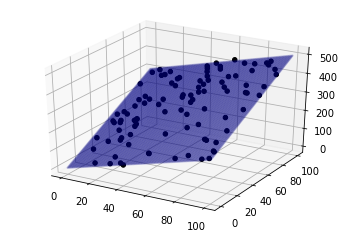

In [89]:
# imports
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# prepping data
X = []
Y = []
for line in open('./data/data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

# solving for model parameters
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
print(f"w_0 = {w[0]}, w_1 = {w[1]}, w_2 = {w[2]}")

# making predictions
Y_hat = np.dot(X, w)

# plotting datapoints
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 1], X[:, 2], Y[:], alpha=1, c='black')
#ax.scatter(X[:, 1], X[:, 2], Y_hat[:])

# plotting hyperplane
x1_pred = np.linspace(0, 100, 100)
x2_pred = np.linspace(0, 100, 100)
x1_pred, x2_pred = np.meshgrid(x1_pred, x2_pred)
input_data = np.array([1.0, x1_pred.flatten(), x2_pred.flatten()]).T
y_hat = np.dot(input_data, w)
ax.scatter(x1_pred.flatten(), x2_pred.flatten(), y_hat, facecolor=(0,0,0,0), s=2, edgecolor='#0000aa', alpha=0.2)

# calculating R^2
SS_res = (Y_hat - Y).dot(Y_hat - Y)
SS_tot = (Y - Y.mean()).dot(Y - Y.mean())
R2 = 1 - SS_res/SS_tot
print(f"R^2 = {R2}")
